In [131]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tifffile as tf
import math
import matplotlib as mpl
from scipy.stats import wilcoxon
import csv

file_folder_list_ach_1 = ['20230417-nsyb-G7f-rAch1h/fly2',
                        '20230420-nsyb-G7f-rAch1h/fly2',
                        '20230420-nsyb-G7f-rAch1h/fly3',
                        '20230428-nsyb-G7f-rAch1h/fly1',
                        '20230507-nsyb-G7f-rAch1h/fly1',
                        '20230510-nsyb-G7f-rAch1h/fly1',
                        '20230510-nsyb-G7f-rAch1h/fly2',
                        '20230511-nsyb-G7f-rAch1h/fly2',
                        '20230511-nsyb-G7f-rAch1h/fly3',
                        '20230515-nsyb-G7f-rAch1h/fly1']
file_folder_list_ach_2 = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', 
                 '20230507-fly1', '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
file_folder_list_5ht_1 = ['20230429-nsyb-G7f-r5HT1.0/fly1',
                        '20230506-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly4',
                        '20230517-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly3',
                        '20230603-nsyb-G7f-r5HT1.0/fly1']
file_folder_list_5ht_2 = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', '20230513-r5HT1.0-fly2', 
                '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4', '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', 
                '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']

In [132]:
# choose the variable, channel, odor
# the flag_name changes with filename
filename = 'auc_weighted' # acc / auc_weighted / precision_weighted / recall_weighted / f1_weighted
odor_selected = 1
flag_name = 'AUC' 
title_list = ['G7f','rACh','r5-HT']
if_save = True
ymin = 30
ymax = 100
y_chance = 50

# only left part
br_index = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]
br_name = ['MBPED','MBVL','MBML','LH','SLP','SIP','SMP','CRE','SCL','ICL',
'NO','EB','FB','LAL','AOTU','AVLP','PVLP','IVLP','VES','GOR','SPS','EPA','FLA']
br_olf = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
print(len(br_index))
print(len(br_name))
print(len(br_olf))
the_color = ['black','coral']
the_color_list = []
for i in range(len(br_olf)):
    the_color_list.append(the_color[br_olf[i]])

23
23
23


In [133]:
## Ach
result_path = '../pipeline-revision/results/nsyb-G7f-rAch1h'
sub_path = 'Accuracy_map_DEEPCAD_formal'
atlas_path = '../data'
atlas_file_name = 'align_to_atlas/Transformed_atlas_eroded_r5.tif'
atlas_z_range = range(13,38)
win_x = 4
win_y = 4
win_z = 2

num_channel_choice = 3
num_odor_choice = 4
list_fly =  [0,1,2,3,4,5,6,7,8,9]###### choose fly
LH_none = [4]
num_fly = len(list_fly)
if if_save:
    figure_save_path = './results/' + '2_class_mean'
    folder = os.path.exists(figure_save_path)
    if not folder:
        os.makedirs(figure_save_path)

# compute 
list_acc = np.zeros((num_fly,len(br_index),num_channel_choice,num_odor_choice))
for i,id in enumerate(list_fly):
    # load map
    the_path = result_path + '/' + file_folder_list_ach_2[id] + '/' + sub_path + '/' + filename + '.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)

    # load atlas
    the_atlas_path = atlas_path + '/' + file_folder_list_ach_1[id] + '/' + atlas_file_name
    atlas= tf.imread(the_atlas_path)
    atlas = np.transpose(atlas,[1,2,0])
    atlas = atlas[:,:,atlas_z_range]
    atlas = atlas[range(int(win_x/2),np.size(atlas,0),win_x),:,:]
    atlas = atlas[:,range(int(win_y/2),np.size(atlas,1),win_y),:]
    atlas = atlas[:,:,range(0,np.size(atlas,2),win_z)]

    for j,index in enumerate(br_index):
        if j==3 and i in LH_none:
            continue
        mask = atlas == index
        if np.sum(mask)>0:
            flag = a[:,:,mask]
            if flag.ndim==3:
                data = np.nanmean(flag,2)
            if num_odor_choice == 1:
                list_acc[i,j,:,0] = np.squeeze(data)
            else:
                list_acc[i,j,:,:] = data

list_acc_ach = list_acc
print(np.shape(list_acc_ach))

(10, 23, 3, 4)


In [134]:
## 5ht
result_path = '../pipeline-revision/results/nsyb-G7f-r5HT1.0'
sub_path = 'Accuracy_map_DEEPCAD_formal'
atlas_path = '../data'
atlas_file_name = 'align_to_atlas/Transformed_atlas_eroded_r5.tif'
atlas_z_range = range(13,38)
win_x = 4
win_y = 4
win_z = 2

num_channel_choice = 3
num_odor_choice = 4
list_fly =  [0,1,2,3,4,5,6,7,8,9]###### choose fly
LH_none = [7]
num_fly = len(list_fly)

# compute 
list_acc = np.zeros((num_fly,len(br_index),num_channel_choice,num_odor_choice))
for i,id in enumerate(list_fly):
    # load map
    the_path = result_path + '/' + file_folder_list_5ht_2[id] + '/' + sub_path + '/' + filename + '.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)

    # load atlas
    the_atlas_path = atlas_path + '/' + file_folder_list_5ht_1[id] + '/' + atlas_file_name
    atlas= tf.imread(the_atlas_path)
    atlas = np.transpose(atlas,[1,2,0])
    atlas = atlas[:,:,atlas_z_range]
    atlas = atlas[range(int(win_x/2),np.size(atlas,0),win_x),:,:]
    atlas = atlas[:,range(int(win_y/2),np.size(atlas,1),win_y),:]
    atlas = atlas[:,:,range(0,np.size(atlas,2),win_z)]

    for j,index in enumerate(br_index):
        if j==3 and i in LH_none:
            continue
        mask = atlas == index
        if np.sum(mask)>0:
            flag = a[:,:,mask]
            if flag.ndim==3:
                data = np.nanmean(flag,2)
            if num_odor_choice == 1:
                list_acc[i,j,:,0] = np.squeeze(data)
            else:
                list_acc[i,j,:,:] = data

list_acc_5ht = list_acc
print(np.shape(list_acc_5ht))

(10, 23, 3, 4)


[9.53674316e-07 9.53674316e-07 9.53674316e-07 6.03961945e-03
 9.53674316e-07 9.53674316e-07 9.53674316e-07 9.53674316e-07
 3.53813171e-04 4.10079956e-05 4.76837158e-06 9.53674316e-07
 9.53674316e-07 9.53674316e-07 9.53674316e-07 1.90734863e-06
 6.04629517e-04 1.81169510e-02 1.90734863e-06 4.78164673e-01
 8.91916275e-01 2.79045105e-03 1.19752884e-02]
[0.00097656 0.00097656 0.00097656 0.08007812 0.00488281 0.00195312
 0.00097656 0.00097656 0.04199219 0.00195312 0.03222656 0.00097656
 0.00097656 0.00292969 0.00097656 0.00097656 0.00097656 0.11621094
 0.00292969 0.8125     0.5        0.34765625 0.8125    ]
[4.88281250e-03 9.76562500e-04 1.95312500e-03 3.47656250e-01
 1.36718750e-02 1.95312500e-03 1.95312500e-03 9.76562500e-04
 9.76562500e-03 5.39062500e-01 1.61132812e-01 3.12500000e-01
 9.76562500e-04 5.39062500e-01 9.66796875e-02 6.83593750e-03
 3.47656250e-01 7.53906250e-01 2.78320312e-01 8.12500000e-01
 9.90234375e-01 2.46093750e-01 5.77148438e-01]


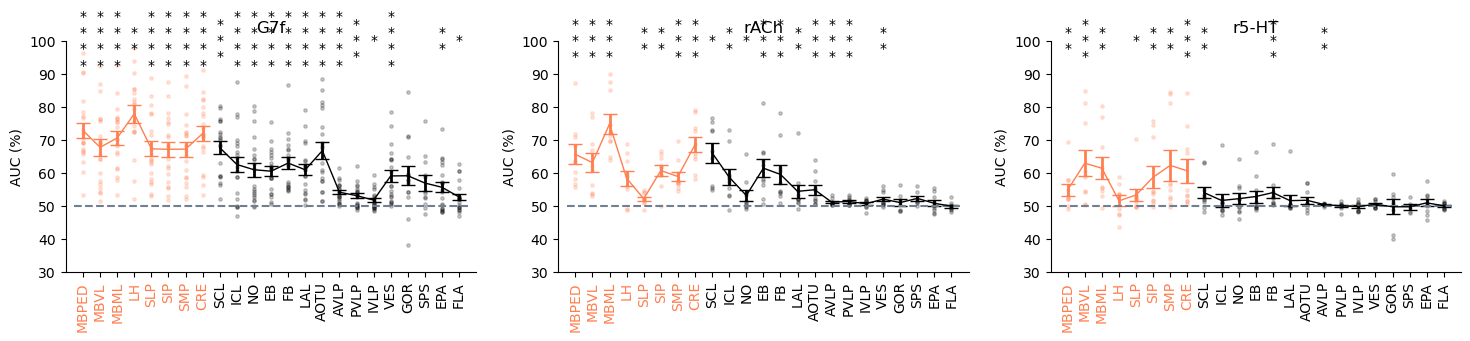

In [135]:
# each olfactory region
fig,ax = plt.subplots(figsize = (18,3),nrows=1,ncols=3)
p_result = []
for ii in range(3):
    if ii==0:
        list_acc_selected = np.concatenate((np.squeeze(list_acc_ach[:,:,1,odor_selected]),np.squeeze(list_acc_5ht[:,:,1,odor_selected])),axis = 0)
    elif ii==1:
        list_acc_selected = np.squeeze(list_acc_ach[:,:,2,odor_selected])
    else:
        list_acc_selected = np.squeeze(list_acc_5ht[:,:,2,odor_selected])
    list_acc_selected = list_acc_selected*100
    list_acc_1 = list_acc_selected


    ax[ii].spines['top'].set_visible(False)
    ax[ii].spines['right'].set_visible(False)
    # plot
    the_mean = np.zeros(len(br_name))
    the_std = np.zeros(len(br_name))
    for j in range(len(br_name)):
        aa = np.squeeze(list_acc_1[:,j])
        the_mean[j] = np.mean(aa[aa!=0])
        the_std[j] = np.std(aa[aa!=0],ddof = 1)/math.sqrt(len(aa[aa!=0]))
    # # bar
    # ax[ii].bar(np.squeeze(np.where(br_olf==1)), the_mean[br_olf==1], width=0.7,yerr = the_std[br_olf==1],error_kw = {'ecolor' : '0.2', 'capsize' :3 },
    #                     alpha=0.7,facecolor = 'white',edgecolor='coral',linewidth=1.5,label = 'Olfactory Region')
    # ax[ii].bar(np.squeeze(np.where(br_olf==0)), the_mean[br_olf==0], width=0.7,yerr = the_std[br_olf==0],error_kw = {'ecolor' : '0.2', 'capsize' :3 },
    #                     alpha=0.7,facecolor = 'white',edgecolor='black',linewidth=1.5,label = 'Others') 

    for j in range(len(br_name)):
        a = np.squeeze(list_acc_1[:,j])
        a = a[a!=0]
        ax[ii].scatter(j*np.ones(np.size(a)),a,color = the_color_list[j],s = 6,alpha = 0.2)

    ## errorbar
    ax[ii].errorbar(np.squeeze(np.where(br_olf==1)),the_mean[br_olf==1],yerr=the_std[br_olf==1],ecolor='coral',elinewidth=2,marker='.',mfc='coral',\
	mec='coral',mew=1,ms=1,alpha=1,capsize=5,capthick=3,color='coral', linewidth=1)   
    ax[ii].errorbar(np.squeeze(np.where(br_olf==0)),the_mean[br_olf==0],yerr=the_std[br_olf==0],ecolor='black',elinewidth=2,marker='.',mfc='black',\
	mec='black',mew=1,ms=1,alpha=1,capsize=5,capthick=3,color='black', linewidth=1)  
    
    # #boxplot
    # list_acc_selected_nonzero=[]
    # for j in range(len(br_index)):
    #     aa = np.squeeze(list_acc_1[:,j])
    #     aa = aa[aa!=0]
    #     aa = aa.tolist()
    #     list_acc_selected_nonzero.append(aa)
    #     jittered_x = np.random.normal(j, 0.05, len(aa)) 
    #     ax[ii].scatter(jittered_x, aa, color='black', alpha=0.3,s = 10)
    # list_acc_selected_nonzero = np.array(list_acc_selected_nonzero,object)
    # ax[ii].boxplot((list_acc_selected_nonzero[br_olf==0][:]).tolist(),
    #         medianprops={'color': 'black', 'linewidth': '1.5'},
    #         # meanline=True,
    #         # showmeans=True,
    #         # meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
    #         showfliers=False,
    #         positions= np.squeeze(np.where(br_olf==0)),
    #         boxprops = {'color': 'black', 'linewidth': '1.5'},
    #         whiskerprops = {'color': 'black', 'linewidth': '1.5'},
    #         capprops =  {'color': 'black', 'linewidth': '1.5'},
    #         flierprops={"marker": "o", "markerfacecolor": "black","markeredgecolor":"black", "markersize": 2})
    # ax[ii].boxplot((list_acc_selected_nonzero[br_olf==1][:]).tolist(),
    #         medianprops={'color': 'red', 'linewidth': '1.5'},
    #         # meanline=True,
    #         # showmeans=True,
    #         # meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
    #         showfliers=False,
    #         positions= np.squeeze(np.where(br_olf==1)),
    #         boxprops = {'color': 'red', 'linewidth': '1.5'},
    #         whiskerprops = {'color': 'red', 'linewidth': '1.5'},
    #         capprops =  {'color': 'red', 'linewidth': '1.5'},
    #         flierprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor":"red","markersize": 2})



    ax[ii].plot([0-0.5,len(br_name)-0.5],[y_chance,y_chance],color = 'slategray',linestyle='--')
    # for j in range(len(br_name_1)):
    #     for i in range(num_fly):
    #         if list_acc_1[i,j]!=0:
    #             plt.scatter(j,list_acc_1[i,j],color = 'black',s = 6)
    ax[ii].set_xticks(range(len(br_name)),br_name,rotation=90)
    # ax[ii].legend()
    ax[ii].set_ylabel((flag_name + ' (%)'))
    ax[ii].set_xlim((-1,len(br_name)))
    ax[ii].set_ylim((ymin,ymax))
    ax[ii].set_title(title_list[ii])
    for j in range(len(br_name)):
        if br_olf[j]==1:
            ax[ii].get_xticklabels()[j].set_color('coral') 
    ## significance
    p_list = []
    for i in range(len(br_name)):
        a = np.squeeze(list_acc_1[:,i])-y_chance
        
        res = wilcoxon(a,alternative = 'greater')
        p = res.pvalue
        p_list.append(p)
    p_list = np.array(p_list)
    print(p_list)
    for i in range(len(br_name)):
        p = p_list[i]
        if p<0.05 and p>=0.01:
            ax[ii].text(i,ymax,'*',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.01 and p>0.001:
            ax[ii].text(i,ymax,'*\n*',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.001 and p>=0.0001:
            ax[ii].text(i,ymax,'*\n*\n*',verticalalignment = 'center', horizontalalignment = 'center') 
        elif p<0.0001:
            ax[ii].text(i,ymax,'*\n*\n*\n*',verticalalignment = 'center', horizontalalignment = 'center') 
    p_result.append(p_list)
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + 'revision_r1_m2_all_accuracy_map_region_' + filename + '_odor'+str(odor_selected)+'-bar-ver.pdf',dpi = 300,bbox_inches = 'tight')
    plt.savefig(figure_save_path + '/' + 'revision_r1_m2_all_accuracy_map_region_' + filename + '_odor'+str(odor_selected)+'-bar-ver.png',dpi = 300,bbox_inches = 'tight')
    with open(figure_save_path + '/' + 'revision_r1_m2_all_accuracy_map_region_' + filename + '_odor'+str(odor_selected)+'-p.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(p_result)
plt.show()

In [136]:
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn import svm
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import scale
# import warnings
# # label
# label = np.array([3,1,2,3,2,1,3,1,2,1,2,3,1,2,3,2,3,1,3,2,1,2,3,1,2,3,1,2,1,3,2,3,1,2,3,1,3,1,2,3,1,2,3,2,1,2,1,3,2,1,3,1,2,3,1,2,3,2,1,3,1,2,3,2,1,3,1,3,2,3,2,1,3,2,1,3,1,2,3,2,1,3,1,2,3,2,1,2,3,1,
#                  3,1,2,3,1,2,3,2,1,2,3,1,2,1,3,2,1,3,1,3,2,3,1,2,1,2,3,2,3,1,2,3,1,3,2,1,2,3,1,2,1,3,1,2,3,2,3,1,2,1,3,1,3,2,3,1,2,1,2,3,2,1,3,1,2,3,2,3,1,3,1,2,1,3,2,1,3,2,3,1,2,3,2,1,2,1,3,1,2,3])
# num_trial = len(label)
# round = 100
# cv_fold = 5
# kf_random_state = 5
# ifshuffle = True
# kf = KFold(n_splits=cv_fold, random_state=kf_random_state, shuffle=ifshuffle)
# for train, test in kf.split(np.linspace(0,num_trial-1,num_trial)):
#     print('train:'+str(np.sum(label[train]==1))+' '+str(np.sum(label[train]==2)))
#     print('test:'+str(np.sum(label[test]==1))+' '+str(np.sum(label[test]==2)))
# # print(kf)
# clf = svm.SVC(probability=True)
# a_list = []
# for i in range(round):
#     x_pca = np.random.rand(180, 4)
#     a = cross_val_score(clf, x_pca, label, scoring='accuracy', cv=kf)
#     a_list.append(a)

# print(np.mean(a_list))

In [137]:
# label = np.array([3,1,2,3,2,1,3,1,2,1,2,3,1,2,3,2,3,1,3,2,1,2,3,1,2,3,1,2,1,3,2,3,1,2,3,1,3,1,2,3,1,2,3,2,1,2,1,3,2,1,3,1,2,3,1,2,3,2,1,3,1,2,3,2,1,3,1,3,2,3,2,1,3,2,1,3,1,2,3,2,1,3,1,2,3,2,1,2,3,1,
#                  3,1,2,3,1,2,3,2,1,2,3,1,2,1,3,2,1,3,1,3,2,3,1,2,1,2,3,2,3,1,2,3,1,3,2,1,2,3,1,2,1,3,1,2,3,2,3,1,2,1,3,1,3,2,3,1,2,1,2,3,2,1,3,1,2,3,2,3,1,3,1,2,1,3,2,1,3,2,3,1,2,3,2,1,2,1,3,1,2,3])
# label = label[label!=3]
# cv_fold = 5
# kf_random_state = 5
# ifshuffle = True
# kf = KFold(n_splits=cv_fold, random_state=kf_random_state, shuffle=ifshuffle)
# clf = svm.SVC(probability=True)
# a = cross_val_score(clf, x_pca, label, scoring='accuracy', cv=kf)